<a href="https://colab.research.google.com/github/oneryigit/notebooks/blob/main/plotly_epr_vdem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
gr= pd.read_csv("data_g.csv")

In [3]:
ex=gr[gr.status_excl==1]

In [4]:
states=[]
for state in gr.countryname.value_counts().index:
  states.append(state)
  

In [ ]:
states.sort()

states

In [6]:
mena=['Iran (Persia)','Lebanon','Yemen (Arab Republic of Yemen)','Iraq','Israel','Syria','Libya','Saudi Arabia',
      'Turkey (Ottoman Empire)','Egypt','Jordan','Morocco','Kuwait','Algeria','Bahrain',  'Oman','Tunisia',
       'United Arab Emirates','Qatar',"Yemen, People's Republic of","Afghanistan"]

mena_df=gr.query("countryname in @mena")

In [7]:
mena_df.countryname.value_counts()

Lebanon                           825
Iran (Persia)                     825
Yemen (Arab Republic of Yemen)    675
Afghanistan                       525
Iraq                              450
Israel                            438
Syria                             375
Libya                             350
Saudi Arabia                      300
Jordan                            225
Egypt                             225
Turkey (Ottoman Empire)           225
Morocco                           195
Kuwait                            180
Algeria                           118
Bahrain                           100
Oman                               75
Tunisia                            65
Qatar                              50
United Arab Emirates               50
Yemen, People's Republic of        24
Name: countryname, dtype: int64

In [9]:
tr=mena_df[mena_df.countryname=='Turkey (Ottoman Empire)']
tr=tr[["year",'groupname', "status_excl"]]


ir=mena_df[mena_df.countryname=='Iran (Persia)']
ir=ir[["year",'groupname', "status_excl"]]


al=mena_df[mena_df.countryname=='Algeria']
al=al[["year",'groupname', "status_excl"]]


mo=mena_df[mena_df.countryname=='Morocco']
mo=mo[["year",'groupname', "status_excl"]]



In [10]:
mo.groupname.value_counts()

Berbers     65
Arabs       65
Sahrawis    65
Name: groupname, dtype: int64

In [11]:
tr1=tr[tr.groupname=="Kurds"]
tr2=tr[tr.groupname=="Roma"]


ir1=ir[ir.groupname=="Kurds"]
ir2=ir[ir.groupname=="Baloch"]
ir3=ir[ir.groupname=="Turkmen"]
ir4=ir[ir.groupname=="Arabs"]

al1=al[al.groupname=="Berbers"]

mo1=mo[mo.groupname=="Berbers"]
mo2=mo[mo.groupname=="Sahrawis"]


In [12]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1, shared_yaxes='all', shared_xaxes=True, subplot_titles=('Turkey','Iran', "Morocco", "Algeria"),
vertical_spacing=0.02,print_grid=False, x_title="Year", y_title="Excluded Minorities")

# Add the plots to the subplot
fig.add_trace(go.Scatter(x=tr1['year'], y=tr1['status_excl'], mode='lines', name="Kurds",line=dict(color='firebrick', width=3, dash='dot'),legendgroup = '1'),row=1, col=1)
fig.add_trace(go.Scatter(x=tr2['year'], y=tr2['status_excl'], mode='lines',name="Roma", line=dict(color='black', width=3, dash='dash'),legendgroup = '1'),row=1, col=1)


fig.add_trace(go.Scatter(x=ir1['year'], y=ir1['status_excl'], mode='lines', name="Kurds",legendgroup = '2',line=dict(color='firebrick', width=3, dash='dot')),row=2, col=1)
fig.add_trace(go.Scatter(x=ir2['year'], y=ir2['status_excl'], mode='lines',name="Baloch",legendgroup = '2',line=dict(color='blue', width=3, dash='dash')),row=2, col=1)
fig.add_trace(go.Scatter(x=ir1['year'], y=ir1['status_excl'], mode='lines',name="Turkmen",legendgroup = '2',opacity=0.8,line=dict(color='orange', width=3,dash='longdash')),row=2, col=1, )
fig.add_trace(go.Scatter(x=ir2['year'], y=ir2['status_excl'], mode='lines',name="Arabs", opacity=0.5 ,legendgroup = '2',line=dict(color='black', width=3, dash='dot')),row=2, col=1)

fig.add_trace(go.Scatter(x=mo2['year'], y=mo2['status_excl'], mode='lines',name="Sahrawis",legendgroup = '3',line=dict(color='firebrick', width=3, dash='dot')),row=3, col=1)
fig.add_trace(go.Scatter(x=mo1['year'], y=mo1['status_excl'], mode='lines',name="Berbers",legendgroup = '3',line=dict(color='black', width=3, dash='dash')),row=3, col=1)

fig.add_trace(go.Scatter(x=al1['year'], y=al1['status_excl'], mode='lines',name="Berbers",legendgroup = '4',line=dict(color='firebrick', width=3, dash='dot')),row=4, col=1)

# # Update the layout of the subplot
fig.update_layout(template='plotly_white',autosize=False, width=1000, height=500,  title="Ethnic Power Relations (EPR)",legend_tracegroupgap=35)
# fig.update_layout(legend=dict(y=0.5))

fig.update_xaxes(showgrid = False, showline = False,zeroline = False) # Hide x axis ticks 
fig.update_yaxes(showticklabels=False, showgrid = False, showline = False,zeroline = False) # Hide y axis ticks


# add annotation
# fig.add_annotation(dict(font=dict(color='black',size=12),
#                                         x=0,
#                                         y=-0.25,
#                                         showarrow=False,
#                                         text="According to EPR, there has been no change in conditions of ethnic minorities either accessing state power or anything else.",
#                                         textangle=0,
#                                         xanchor='left',
#                                         xref="paper",
#                                         yref="paper"))
# Show the subplot
fig.show()

fig.write_image("EPR_minorities.pdf")


# VDEM

In [ ]:
vdem=pd.read_csv("vdem.csv")

In [ ]:
vdem=vdem[['year', "country_name", "v2xpe_exlsocgr"]]

In [ ]:
states=[]
for state in vdem.country_name.value_counts().index:
  states.append(state)

In [ ]:
states.sort()

In [ ]:
states

In [ ]:
vdem=vdem.dropna()

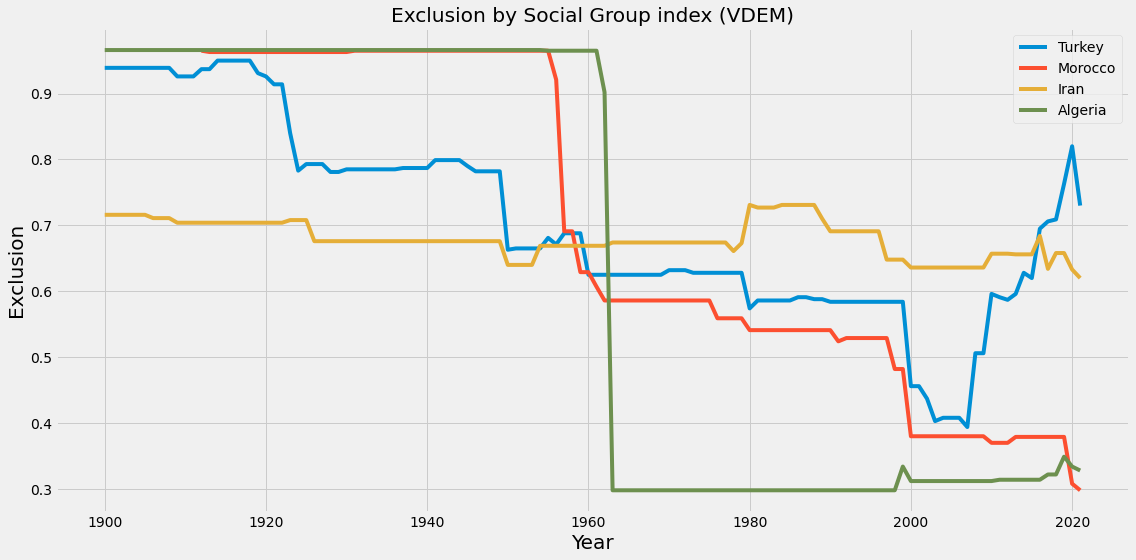

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.autolayout"] = True

fig, ax= plt.subplots(figsize= (16,8))
vdem[vdem.country_name=="Turkey"].plot(x="year", y="v2xpe_exlsocgr", ax=ax, label="Turkey")
vdem[vdem.country_name=="Morocco"].plot(x="year", y="v2xpe_exlsocgr", ax=ax,label="Morocco")
vdem[vdem.country_name=="Iran"].plot(x="year", y="v2xpe_exlsocgr", ax=ax, label="Iran")
vdem[vdem.country_name=="Algeria"].plot(x="year", y="v2xpe_exlsocgr", ax=ax, label="Algeria")
plt.title("Exclusion by Social Group index (VDEM)")
ax.set_xlabel("Year", size=20)
ax.set_ylabel("Exclusion", size=20)
plt.tight_layout()
plt.savefig('exclusion_vdem.pdf')
plt.show()

